In [2]:
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# 设置参数
N = 1000  # 节点数
m = 20    # 每个新节点连接的边数
beta = 0.005  # 感染率
gamma = 0.01  # 恢复率（仅SIR模型需要）
initial_infected = 1  # 初始感染人数

# 创建Barabási-Albert随机网络
ba_graph = nx.barabasi_albert_graph(N, m)

# 1. SI模型模拟
print("运行SI模型模拟...")
si_model = ep.SIModel(ba_graph)
si_config = mc.Configuration()
si_config.add_model_parameter('beta', beta)
si_config.add_model_parameter('fraction_infected', initial_infected/N)
si_model.set_initial_status(si_config)

# 运行SI模型模拟
si_iterations = si_model.iteration_bunch(200)
si_trends = si_model.build_trends(si_iterations)

# 提取SI模型结果
si_time = list(range(len(si_iterations)))
si_infected = [iteration['node_count'][1] for iteration in si_iterations]
si_infected_ratio = [count/N for count in si_infected]

# 2. SIR模型模拟
print("运行SIR模型模拟...")
sir_model = ep.SIRModel(ba_graph)
sir_config = mc.Configuration()
sir_config.add_model_parameter('beta', beta)
sir_config.add_model_parameter('gamma', gamma)
sir_config.add_model_parameter('fraction_infected', initial_infected/N)
sir_model.set_initial_status(sir_config)

# 运行SIR模型模拟
sir_iterations = sir_model.iteration_bunch(200)
sir_trends = sir_model.build_trends(sir_iterations)

# 提取SIR模型结果
sir_time = list(range(len(sir_iterations)))
sir_susceptible = [iteration['node_count'][0] for iteration in sir_iterations]
sir_infected = [iteration['node_count'][1] for iteration in sir_iterations]
sir_recovered = [iteration['node_count'][2] for iteration in sir_iterations]

sir_susceptible_ratio = [count/N for count in sir_susceptible]
sir_infected_ratio = [count/N for count in sir_infected]
sir_recovered_ratio = [count/N for count in sir_recovered]



运行SI模型模拟...
运行SIR模型模拟...


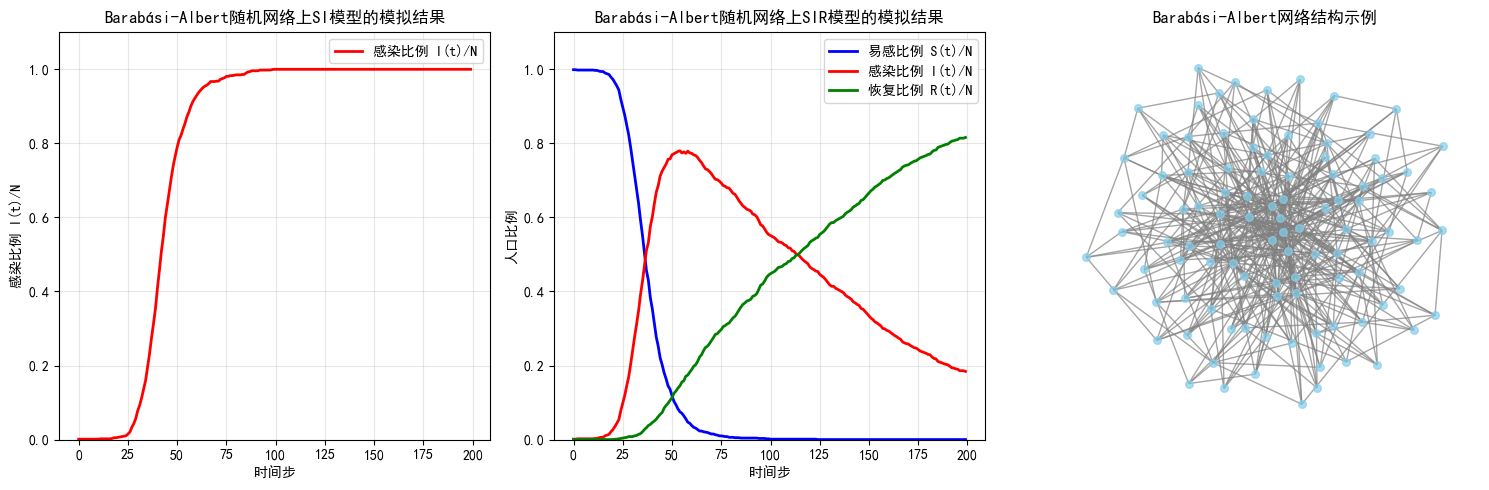


模拟统计信息:
总人口: 1000
网络类型: Barabási-Albert (m=20)
初始感染者: 1
感染率 β: 0.005
恢复率 γ: 0.01

SI模型最终感染比例: 1.0000
SIR模型最终状态:
  易感比例: 0.0000
  感染比例: 0.1840
  恢复比例: 0.8160
  SIR模型峰值感染比例: 0.7800


In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
# 绘制结果
plt.figure(figsize=(15, 5))

# 图7.6: SI模型结果
plt.subplot(1, 3, 1)
plt.plot(si_time, si_infected_ratio, 'r-', linewidth=2, label='感染比例 I(t)/N')
plt.xlabel('时间步')
plt.ylabel('感染比例 I(t)/N')
plt.title('Barabási-Albert随机网络上SI模型的模拟结果')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 1.1)

# 图7.7: SIR模型结果
plt.subplot(1, 3, 2)
plt.plot(sir_time, sir_susceptible_ratio, 'b-', linewidth=2, label='易感比例 S(t)/N')
plt.plot(sir_time, sir_infected_ratio, 'r-', linewidth=2, label='感染比例 I(t)/N')
plt.plot(sir_time, sir_recovered_ratio, 'g-', linewidth=2, label='恢复比例 R(t)/N')
plt.xlabel('时间步')
plt.ylabel('人口比例')
plt.title('Barabási-Albert随机网络上SIR模型的模拟结果')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 1.1)

# 网络可视化
plt.subplot(1, 3, 3)
# 使用弹簧布局可视化网络的一小部分（100个节点）以提高可读性
small_graph = nx.barabasi_albert_graph(100, 5)
pos = nx.spring_layout(small_graph, seed=42)
nx.draw(small_graph, pos, node_size=30, node_color='skyblue', edge_color='gray', alpha=0.7)
plt.title('Barabási-Albert网络结构示例')
plt.axis('off')

plt.tight_layout()
plt.show()

# 输出统计信息
print("\n模拟统计信息:")
print(f"总人口: {N}")
print(f"网络类型: Barabási-Albert (m={m})")
print(f"初始感染者: {initial_infected}")
print(f"感染率 β: {beta}")
print(f"恢复率 γ: {gamma}")

print(f"\nSI模型最终感染比例: {si_infected_ratio[-1]:.4f}")
print(f"SIR模型最终状态:")
print(f"  易感比例: {sir_susceptible_ratio[-1]:.4f}")
print(f"  感染比例: {sir_infected_ratio[-1]:.4f}")
print(f"  恢复比例: {sir_recovered_ratio[-1]:.4f}")
print(f"  SIR模型峰值感染比例: {max(sir_infected_ratio):.4f}")